# Flower Classification with Transfer Learning

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

### Import Required Libraries and Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Collect Image Paths for Each Flower Category (daisy,dandelion,rose,sunflower,tulip)

In [2]:
daisy = glob('daisy/*.jpg')
dandelion = glob('dandelion/*.jpg')
rose = glob('rose/*.jpg')
sunflower = glob('sunflower/*.jpg')
tulip = glob('tulip/*.jpg')

### Define Classes and Corresponding Labels

In [3]:
classes = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

### Load and Label Images for Each Flower Category

In [4]:
images = []
labels = []

for i in daisy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in dandelion:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in rose:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in sunflower:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in tulip:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

### Plot first few images

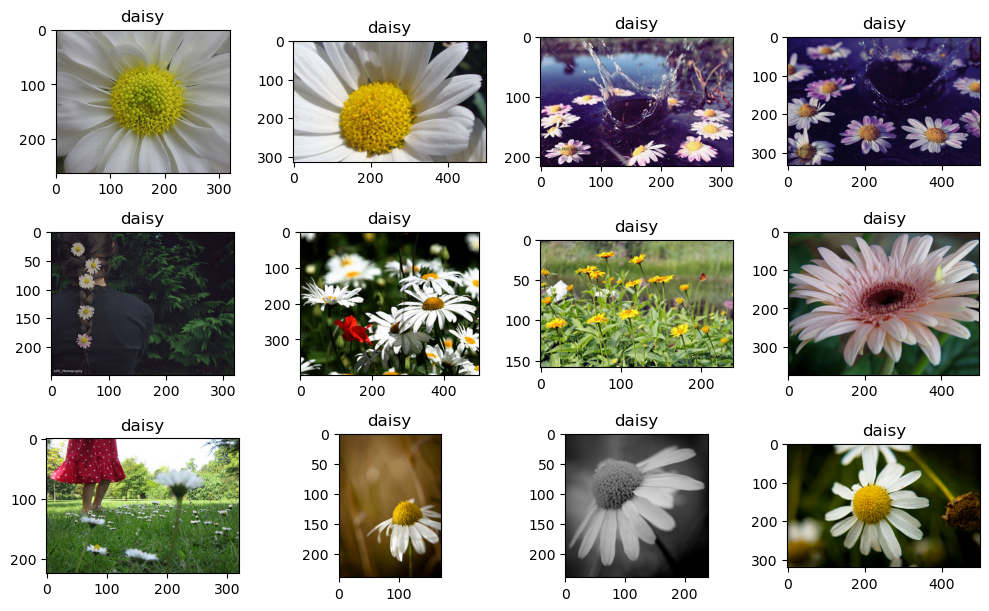

In [5]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle the images

In [6]:
images,labels = shuffle(images,labels)

### Plot some of the image after the shuffle

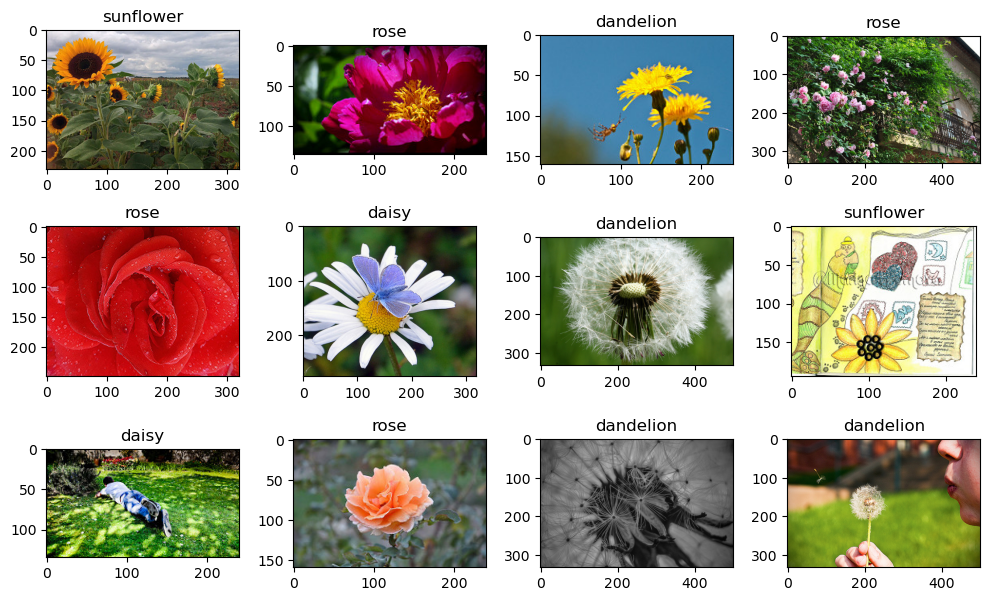

In [7]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [8]:
X = []

for i in images:
    X.append(resize(i, (224,224,3)))

### Plot some of the images after resizing

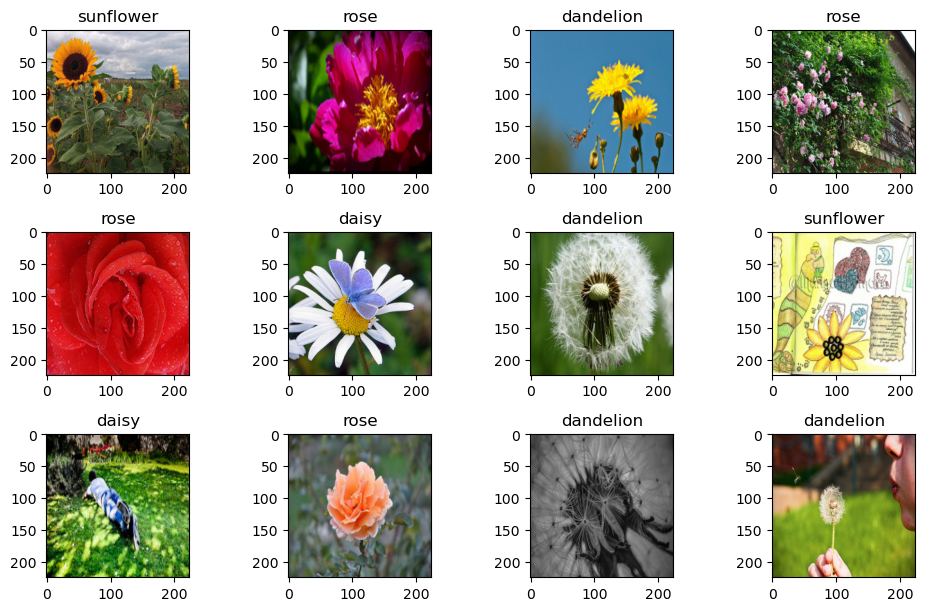

In [9]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [10]:
X = np.array(X)
y = np.array(labels)

### Convert Images and Labels to NumPy Arrays

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL 
* "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [13]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [14]:
vgg16_base.trainable = False

### Define Number of Output Classes

In [15]:
num_of_classes = 5

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [17]:
model = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(14, activation='relu'),
    layers.Dense(num_of_classes, activation='softmax')
])

### Compile Transfer Learning Model

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [19]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.4498 - loss: 1.3750 - val_accuracy: 0.7341 - val_loss: 0.7276
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.7677 - loss: 0.6189 - val_accuracy: 0.7803 - val_loss: 0.6827
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.8543 - loss: 0.4166 - val_accuracy: 0.7688 - val_loss: 0.6829
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9048 - loss: 0.2827 - val_accuracy: 0.7977 - val_loss: 0.5587
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.9381 - loss: 0.1940 - val_accuracy: 0.8382 - val_loss: 0.5873
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9549 - loss: 0.1392 - val_accuracy: 0.7977 - val_loss: 0.6796
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9608 - loss: 0.1281 - val_accuracy: 0.7919 - val_loss: 0.6158
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9617 - loss: 0.1125 - val_accu

### Model Prediction on Test Data

In [20]:
y_pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step


In [21]:
y_pred = [np.argmax(i) for i in y_pred]

### Calculate Accuracy Score

In [22]:
accuracy_score(y_test,y_pred)

0.8298611111111112

### Plot confusion matrix on heatmap

<Axes: >

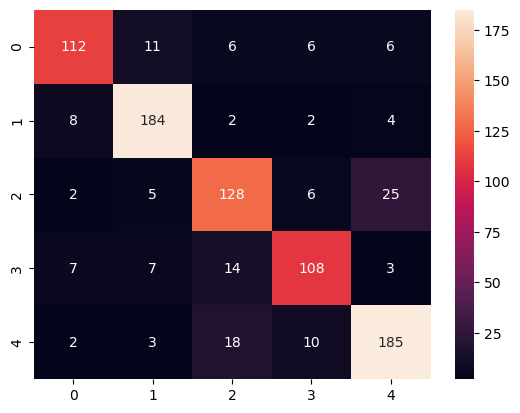

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print classification report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       141
           1       0.88      0.92      0.90       200
           2       0.76      0.77      0.77       166
           3       0.82      0.78      0.80       139
           4       0.83      0.85      0.84       218

    accuracy                           0.83       864
   macro avg       0.83      0.82      0.82       864
weighted avg       0.83      0.83      0.83       864

